# Local Maxima and Minima Stock

https://en.wikipedia.org/wiki/Maximum_and_minimum  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

#### Create Local Maxima and Minima Function

In [2]:
def find_local_extrema(numbers):
    extrema = []
    length = len(numbers)
    
    for i in range(length):
        if i == 0:  # Check the first element
            if numbers[i] > numbers[i+1]:  # Compare with the next element
                extrema.append(numbers[i])
        elif i == length - 1:  # Check the last element
            if numbers[i] > numbers[i-1]:  # Compare with the previous element
                extrema.append(numbers[i])
        else:  # Check elements in between
            if numbers[i] > numbers[i-1] and numbers[i] > numbers[i+1]:  # Compare with both previous and next elements
                extrema.append(numbers[i])
            elif numbers[i] < numbers[i-1] and numbers[i] < numbers[i+1]:  # Compare with both previous and next elements
                extrema.append(numbers[i])
    
    return extrema

In [3]:
numbers = [1, 3, 2, 4, 1, 5, 3, 2]
extrema = find_local_extrema(numbers)
print(extrema)  # Output: [3, 4, 5, 2]

[3, 2, 4, 1, 5]


#### Apply Finance Data to Local Maxima and Minima

In [4]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.831593,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.824474,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.014114,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.481064,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.327000,82271200


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.326321,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.814056,234330000
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.568645,212468400
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.587891,169165600
2018-12-31,39.632500,39.840000,39.119999,39.435001,37.951191,140014000


In [6]:
# Select the 'Adj Close' column for analysis
prices = df['Adj Close'].values

In [7]:
from scipy.signal import argrelextrema

# Find local maxima
maxima_indices = argrelextrema(prices, np.greater)[0]
local_maxima = prices[maxima_indices]

# Find local minima
minima_indices = argrelextrema(prices, np.less)[0]
local_minima = prices[minima_indices]


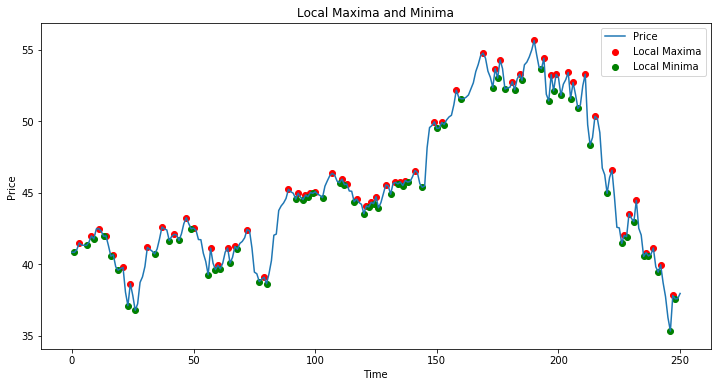

In [8]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Price')
plt.scatter(maxima_indices, local_maxima, c='r', marker='o', label='Local Maxima')
plt.scatter(minima_indices, local_minima, c='g', marker='o', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Local Maxima and Minima')
plt.show()

In [9]:
def find_local_maxima_minima(data):
    local_maxima = []
    local_minima = []

    for i in range(1, len(data) - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1]:
            local_maxima.append((i, data[i]))
        elif data[i] < data[i - 1] and data[i] < data[i + 1]:
            local_minima.append((i, data[i]))

    return local_maxima, local_minima

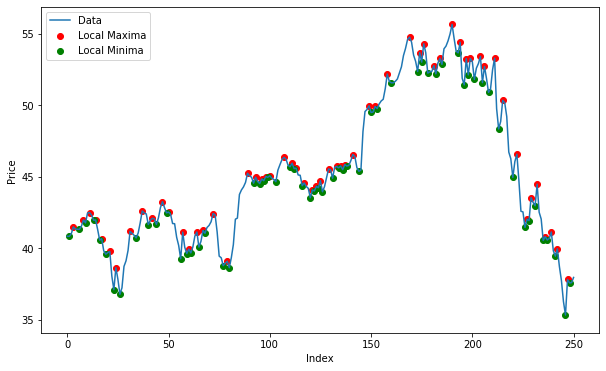

In [10]:
# Find local maxima and minima
maxima, minima = find_local_maxima_minima(prices)

# Plotting the data with local maxima and minima
plt.figure(figsize=(10, 6))
plt.plot(prices, label='Data')
plt.scatter(*zip(*maxima), c='r', label='Local Maxima')
plt.scatter(*zip(*minima), c='g', label='Local Minima')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()